Advertising Sales channel prediction. Its a regression problem as the target variables are numberic values

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Lets begin by reading the csv file
Advert=pd.read_csv("Advertising.csv")
Advert

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [13]:
#Lets convert the csv file into a DataFrame
Advertising_channel=pd.DataFrame(data=Advert)
Advertising_channel

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [15]:
Advertising_channel.shape
#The dataset has 200 rows and 5 columns

(200, 5)

In [18]:
Advertising_channel.dtypes
#The datatypes are float or interger

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [19]:
#look out for any null values
Advertising_channel.isnull().sum()
#There are no null values

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

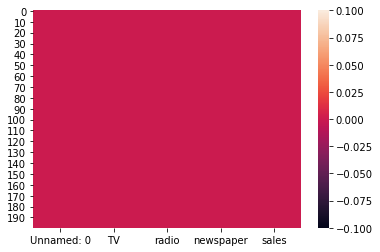

In [20]:
#Lets use heatmap to confirm that there are no null values
sns.heatmap(Advertising_channel.isnull())
#It is confirmed that there are no null values

In [26]:
Advertising_channel.describe()
# skewness is the most in newspaper as the difference between the mean and the median values is the most. Rest of the attributes, TV and radio seem to follow a normal distribution.
# the standard deviation is the maximum in TV i.e. the spread of the data is the most in that attribute

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [21]:
#Lets perform univariate analysis on independent variables

<AxesSubplot:xlabel='TV'>

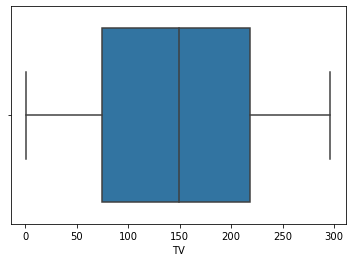

In [22]:
sns.boxplot(x="TV",data=Advertising_channel)
#the minimum value is 0.7. The median value is 150 and the maximum value is 296

<AxesSubplot:xlabel='TV', ylabel='Density'>

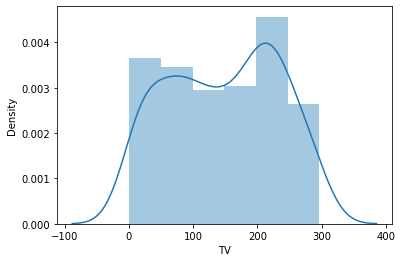

In [27]:
sns.distplot(Advertising_channel["TV"],kde=True)
#the density is evenly distributed between 0 and 250

<AxesSubplot:xlabel='radio'>

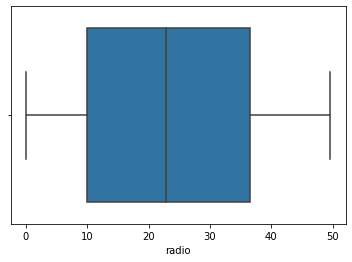

In [28]:
sns.boxplot(Advertising_channel["radio"])
#the minimum value is 0. The meidan value is 23 and the maximum value is 50

<AxesSubplot:xlabel='radio', ylabel='Density'>

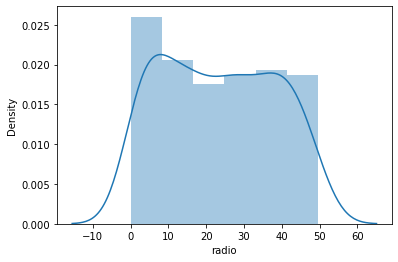

In [29]:
sns.distplot(Advertising_channel["radio"])
#the density of more or less evenly distributed between 0 and 50

<AxesSubplot:xlabel='newspaper'>

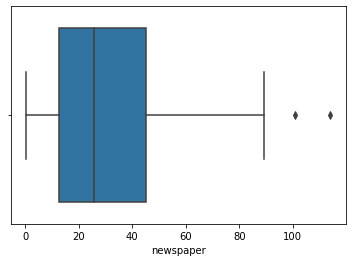

In [30]:
sns.boxplot(Advertising_channel["newspaper"])
#the minimum value is 0.3. The meidan value is 26 and the maximum value is 114

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

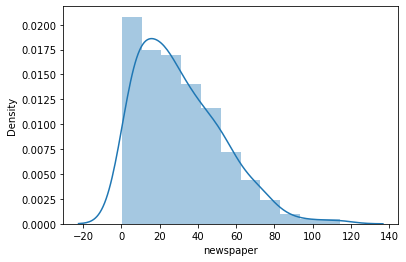

In [31]:
sns.distplot(Advertising_channel["newspaper"])
#the sknewss is to the right and the density is distributed between 0 to 20

In [32]:
#Lets perform bivariate analysis

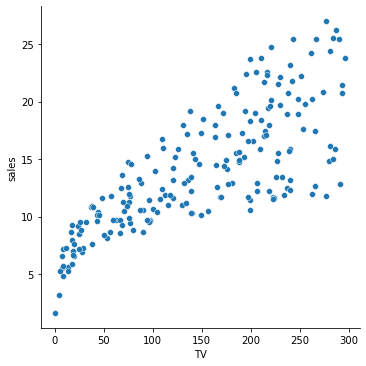

In [36]:
sns.relplot(x="TV",y="sales",kind="scatter",data=Advertising_channel)
# the pattern seems to be that of a linear regression with total sales and TV having a direct relationship

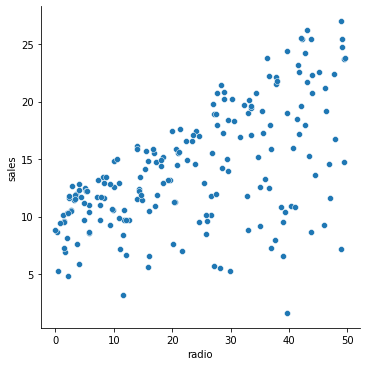

In [37]:
sns.relplot(x="radio",y="sales",kind="scatter",data=Advertising_channel)
# In most cases, the total sales increase with increase in distribution of radio

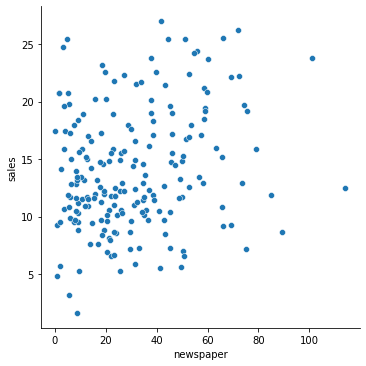

In [39]:
sns.relplot(x="newspaper",y="sales",kind="scatter",data=Advertising_channel)
# In most cases, the total sales increase with increase in distribution of newspaper but the plot is not linear.

In [40]:
#Since outliers are only present in newspaper and that too hardly any there is no need to remove outliers

In [42]:
Advertising_channel.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [41]:
#lets treat the skewness present in newspaper

In [49]:
Advertising_channel["newspaper"]=power_transform(Advertising_channel["newspaper"].values.reshape(-1,1))
Advertising_channel

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,1.544296,22.1
1,2,44.5,39.3,0.781636,10.4
2,3,17.2,45.9,1.547119,9.3
3,4,151.5,41.3,1.227819,18.5
4,5,180.8,10.8,1.224714,12.9
...,...,...,...,...,...
195,196,38.2,3.7,-0.693519,7.6
196,197,94.2,4.9,-1.135005,9.7
197,198,177.0,9.3,-1.297774,12.8
198,199,283.6,42.0,1.458526,25.5


In [58]:
#lets start machine learning before which lets separate x and y

In [60]:
x=Advertising_channel.iloc[:,1:4]
x

,radio,newspaper,sales
0,37.8,1.544296,22.1
1,39.3,0.781636,10.4
2,45.9,1.547119,9.3
3,41.3,1.227819,18.5
4,10.8,1.224714,12.9
...,...,...,...
195,3.7,-0.693519,7.6
196,4.9,-1.135005,9.7
197,9.3,-1.297774,12.8
198,42.0,1.458526,25.5


In [63]:
S=StandardScaler()
x=S.fit_transform(x)
x

array([[ 9.81522472e-01,  1.54429626e+00,  1.55205313e+00],
       [ 1.08280781e+00,  7.81635855e-01, -6.96046111e-01],
       [ 1.52846331e+00,  1.54711875e+00, -9.07405869e-01],
       [ 1.21785493e+00,  1.22781940e+00,  8.60330287e-01],
       [-8.41613655e-01,  1.22471423e+00, -2.15683025e-01],
       [ 1.73103399e+00,  1.70434613e+00, -1.31091086e+00],
       [ 6.43904671e-01, -1.29948529e-01, -4.27042783e-01],
       [-2.47406325e-01, -8.49495883e-01, -1.58039455e-01],
       [-1.42906863e+00, -2.06812025e+00, -1.77205942e+00],
       [-1.39530685e+00, -2.50101105e-01, -6.57617064e-01],
       [-1.17923146e+00, -9.46254925e-02, -1.04190753e+00],
       [ 4.96973404e-02, -1.57165278e+00,  6.48970529e-01],
       [ 7.99208859e-01,  1.44982898e+00, -9.26620392e-01],
       [-1.05768905e+00, -1.21867084e+00, -8.30547775e-01],
       [ 6.50657027e-01,  8.13743543e-01,  9.56402904e-01],
       [ 1.65000572e+00,  1.04911106e+00,  1.60969670e+00],
       [ 9.00494200e-01,  2.63264875e+00

In [65]:
y=Advertising_channel["sales"]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [66]:
x.shape

(200, 3)

In [67]:
y.shape

(200,)

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


Lets use four different algorithms to check the score. We shall be using the following algorithms:
1)Linear Regression
2)Decision Tree
3)Laso
4)Ridge

In [87]:
#1)Linear Regression
lm=LinearRegression()
lm.fit(x_train,y_train)
print(lm.coef_)
print(lm.intercept_)
#predict y values
pred1=lm.predict(x_test)
print(r2_score(pred1,y_test))
score1=cross_val_score(lm,x,y,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

[-1.52460585e-15 -8.23498353e-16  5.20439658e+00]
14.022500000000003
1.0
[1. 1. 1. 1. 1.]
1.0
0.0


In [88]:
#2)Decision Tree
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print(dtc.score(x_train,y_train))
#predict y values
pred2=dtc.predict(x_test)
print(r2_score(y_test,pred2))
score2=cross_val_score(dtc,x,y,cv=5)
print(score2)
print(score2.mean())
print(score2.std())

1.0
0.9986754372659316
[0.99917787 0.99852288 0.99832824 0.98269606 0.99645184]
0.9950353786022298
0.006235878717566954


In [85]:
#3) Lasso (It will try to omit the coefficient)
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.coef_)
print(ls.intercept_)

#predict y
pred3=ls.predict(x_test)

print(r2_score(pred3,y_test))
score3=cross_val_score(ls,x,y,cv=5)
print(score3)
print(score3.mean())
print(score3.std())

[1.97858071e-04 0.00000000e+00 5.20417278e+00]
14.022508521329243
0.999999998458415
[1. 1. 1. 1. 1.]
0.9999999989430725
1.0311237175743149e-09


In [89]:
#4) Ridge (It will try to reduce the coefficient gap)
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
print(rd.coef_)
print(rd.intercept_)
#predict y
pred4=rd.predict(x_test)
print(r2_score(y_test,pred4))
score4=cross_val_score(rd,x,y,cv=5)
print(score4)
print(score4.mean())
print(score4.std())

[3.89318093e-06 1.04229748e-07 5.20439029e+00]
14.022500504487649
0.999999999998733
[1. 1. 1. 1. 1.]
0.9999999999993188
3.303496285943516e-13


In [90]:
#Linear regression is the best fit model so let perform hypertuning for the same

In [92]:
parameters={"fit_intercept":["True","False"],"normalize":["True","False"],"copy_X":["True","False"],"n_jobs":[1,10]}
rsearch=RandomizedSearchCV(lm,parameters)
rsearch.fit(x_train,y_train)

RandomizedSearchCV(estimator=LinearRegression(),
                   param_distributions={'copy_X': ['True', 'False'],
                                        'fit_intercept': ['True', 'False'],
                                        'n_jobs': [1, 10],
                                        'normalize': ['True', 'False']})

In [93]:
print(rsearch.best_estimator_)
print(rsearch.best_params_)
print(rsearch.best_score_)

LinearRegression(copy_X='True', fit_intercept='True', n_jobs=10,
                 normalize='True')
{'normalize': 'True', 'n_jobs': 10, 'fit_intercept': 'True', 'copy_X': 'True'}
1.0


In [94]:
#Put these values back in to the linear regression model
lm=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=10,normalize=True)
lm.fit(x_train,y_train)
print(lm.coef_)
print(lm.intercept_)
#predict y values
pred1=lm.predict(x_test)
print(r2_score(pred1,y_test))

[ 9.14763510e-16 -7.73160571e-16  5.20439658e+00]
14.022500000000003
1.0


In [96]:
#lets perform serialisation to dump the model
joblib.dump(lm,"lmfile.obj")

['lmfile.obj']